# 十三、聚类

### 1. 样本相似性：欧氏距离

- 用两个样本对应特征值之差的平方和之平方根，即欧氏距离，来表示这两个样本的相似性。

$$P(x1)-Q(x2):|x1-x2|=\sqrt{(x1-x2)^2}$$

$$P(x1,y1)-Q(x2,y2):\sqrt{(x1-x2)^2+(y1-y2)^2}$$

$$P(x1,y1,z1)-Q(x2,y2,z2):
\sqrt{(x1-x2)^2+(y1-y2)^2+(z1-z2)^2}$$

### 2. K均值算法

- 第一步：随机选择k个样本作为k个聚类的中心，计算每个样本到各个聚类中心的欧氏距离，将该样本分配到与之距离最近的聚类中心所在的类别中。

- 第二步：根据第一步所得到的聚类划分，分别计算每个聚类的几何中心，将几何中心作为新的聚类中心，重复第一步，直到计算所得几何中心与聚类中心重合或接近重合为止。

>1. 聚类数k必须事先已知。借助某些评估指标，优选最好的聚类数。
2. 聚类中心的初始选择会影响到最终聚类划分的结果。初始中心尽量选择距离较远的样本。

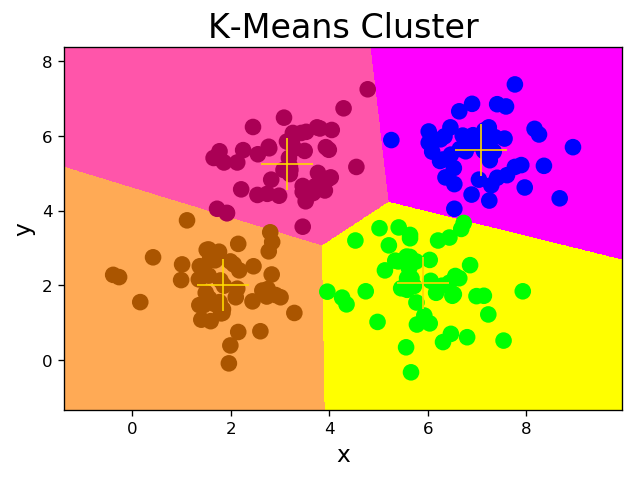

In [3]:
# km.py
import numpy as np
import sklearn.cluster as sc
import matplotlib.pyplot as mp
x = []
with open('../data/multiple3.txt', 'r') as f:
    for line in f.readlines():
        data = [float(substr) for substr in line.split(',')]
        x.append(data)
x = np.array(x)

# K均值聚类器
model = sc.KMeans(n_clusters=4)
model.fit(x)
centers = model.cluster_centers_
l, r, h = x[:, 0].min() - 1, x[:, 0].max() + 1, 0.005
b, t, v = x[:, 1].min() - 1, x[:, 1].max() + 1, 0.005
grid_x = np.meshgrid(np.arange(l, r, h), np.arange(b, t, v))
flat_x = np.c_[grid_x[0].ravel(), grid_x[1].ravel()]
flat_y = model.predict(flat_x)
grid_y = flat_y.reshape(grid_x[0].shape)
pred_y = model.predict(x)
mp.figure('K-Means Cluster', dpi=120)
mp.title('K-Means Cluster', fontsize=20)
mp.xlabel('x', fontsize=14)
mp.ylabel('y', fontsize=14)
mp.tick_params(labelsize=10)
mp.pcolormesh(grid_x[0], grid_x[1], grid_y, cmap='spring')
mp.scatter(x[:, 0], x[:, 1], c=pred_y, cmap='brg', s=80)
mp.scatter(centers[:, 0], centers[:, 1], marker='+', c='gold', s=1000, linewidth=1)
mp.show()

/Users/haoen110/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


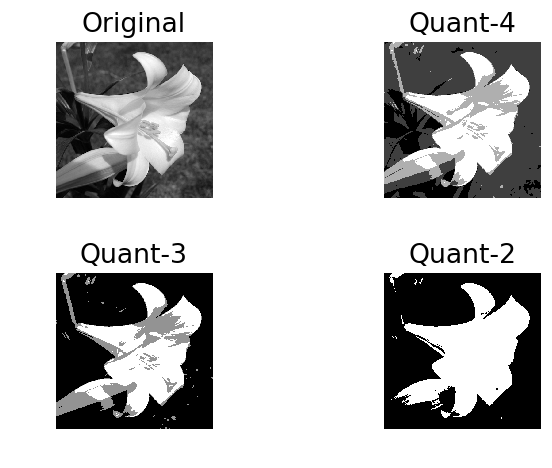

In [4]:
# quant.py
import numpy as np
import scipy.misc as sm
import scipy.ndimage as sn
import sklearn.cluster as sc
import matplotlib.pyplot as mp

# 通过K均值聚类量化图像中的颜色
def quant(image, n_clusters):
    x = image.reshape(-1, 1)
    model = sc.KMeans(n_clusters=n_clusters)
    model.fit(x)
    y = model.labels_
    centers = model.cluster_centers_.squeeze()
    return centers[y].reshape(image.shape)

original = sm.imread('../data/lily.jpg', True)
quant4 = quant(original, 4)
quant3 = quant(original, 3)
quant2 = quant(original, 2)
mp.figure('Image Quant', dpi=120)
mp.subplot(221)
mp.title('Original', fontsize=16)
mp.axis('off')
mp.imshow(original, cmap='gray')
mp.subplot(222)
mp.title('Quant-4', fontsize=16)
mp.axis('off')
mp.imshow(quant4, cmap='gray')
mp.subplot(223)
mp.title('Quant-3', fontsize=16)
mp.axis('off')
mp.imshow(quant3, cmap='gray')
mp.subplot(224)
mp.title('Quant-2', fontsize=16)
mp.axis('off')
mp.imshow(quant2, cmap='gray')
mp.tight_layout()
mp.show()

### 3. 均值漂移算法

- 首先假定样本空间中的每个聚类均服从某种已知的概率分布规则，然后用不同的概率密度函数拟合样本中的统计直方图，不断移动密度函数的中心(均值)的位置，直到获得最佳拟合效果为止。这些概率密度函数的峰值点就是聚类的中心，再根据每个样本距离各个中心的距离，选择最近聚类中心所属的类别作为该样本的类别。

    1. 聚类数不必事先已知，算法会自动识别出统计直方图的中心数量。
    2. 聚类中心不依据于最初假定，聚类划分的结果相对稳定。
    3. 样本空间应该服从某种概率分布规则，否则算法的准确性会大打折扣。

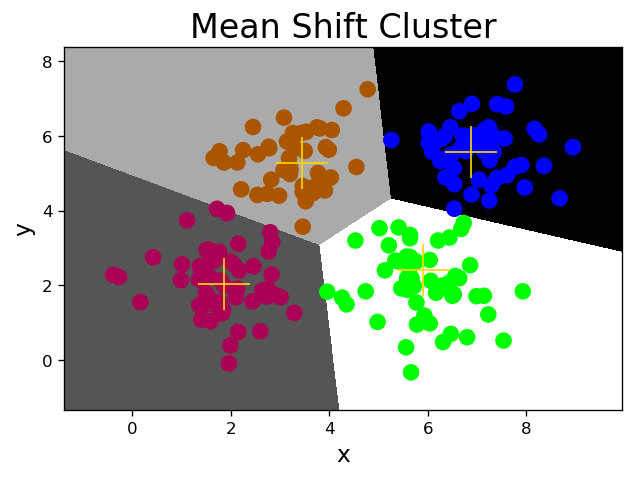

In [5]:
# shift.py
import numpy as np
import sklearn.cluster as sc
import matplotlib.pyplot as mp
x = []
with open('../data/multiple3.txt', 'r') as f:
    for line in f.readlines():
        data = [float(substr) for substr in line.split(',')]
        x.append(data)
x = np.array(x)

# 量化带宽，决定每次调整概率密度函数的步进量
bw = sc.estimate_bandwidth(x, n_samples=len(x), quantile=0.1)

# 均值漂移聚类器
model = sc.MeanShift(bandwidth=bw, bin_seeding=True)
model.fit(x)
centers = model.cluster_centers_
l, r, h = x[:, 0].min() - 1, x[:, 0].max() + 1, 0.005
b, t, v = x[:, 1].min() - 1, x[:, 1].max() + 1, 0.005
grid_x = np.meshgrid(np.arange(l, r, h), np.arange(b, t, v))
flat_x = np.c_[grid_x[0].ravel(), grid_x[1].ravel()]
flat_y = model.predict(flat_x)
grid_y = flat_y.reshape(grid_x[0].shape)
pred_y = model.predict(x)
mp.figure('Mean Shift Cluster', dpi=120)
mp.title('Mean Shift Cluster', fontsize=20)
mp.xlabel('x', fontsize=14)
mp.ylabel('y', fontsize=14)
mp.tick_params(labelsize=10)
mp.pcolormesh(grid_x[0], grid_x[1], grid_y, cmap='gray')
mp.scatter(x[:, 0], x[:, 1], c=pred_y, cmap='brg', s=80)
mp.scatter(centers[:, 0], centers[:, 1], marker='+', c='gold', s=1000, linewidth=1)
mp.show()

### 4. 凝聚层次算法

- 首先假定每个样本都是一个独立的聚类，如果统计出来的聚类数大于期望的聚类数，则从每个样本出发寻找离自己最近的另一个样本，与之聚集，形成更大的聚类，同时令总聚类数减少，不断重复以上过程，直到统计出来的聚类数达到期望值为止。

    1. 聚类数k必须事先已知。借助某些评估指标，优选最好的聚类数。
    2. 没有聚类中心的概念，因此只能在训练集中划分聚类，但不能对训练集以外的未知样本确定其聚类归属。
    3. 在确定被凝聚的样本时，除了以距离作为条件以外，还可以根据连续性来确定被聚集的样本。

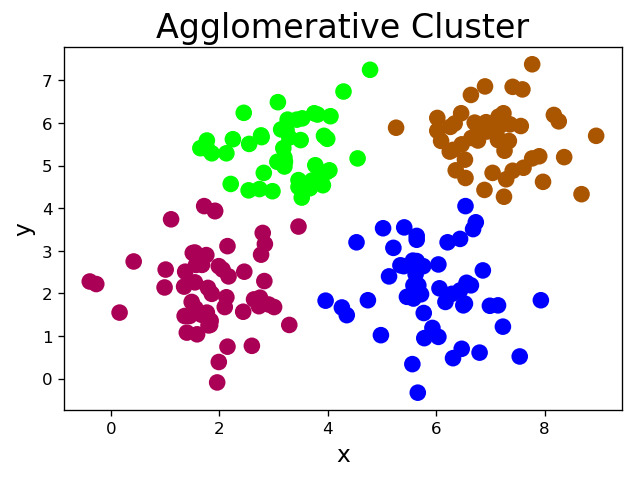

In [6]:
# agglo.py
import numpy as np
import sklearn.cluster as sc
import matplotlib.pyplot as mp
x = []
with open('../data/multiple3.txt', 'r') as f:
    for line in f.readlines():
        data = [float(substr) for substr
                in line.split(',')]
        x.append(data)
x = np.array(x)
# 凝聚层次聚类器
model = sc.AgglomerativeClustering(n_clusters=4)
pred_y = model.fit_predict(x)
mp.figure('Agglomerative Cluster', dpi=120)
mp.title('Agglomerative Cluster', fontsize=20)
mp.xlabel('x', fontsize=14)
mp.ylabel('y', fontsize=14)
mp.tick_params(labelsize=10)
mp.scatter(x[:, 0], x[:, 1], c=pred_y, cmap='brg', s=80)
mp.show()

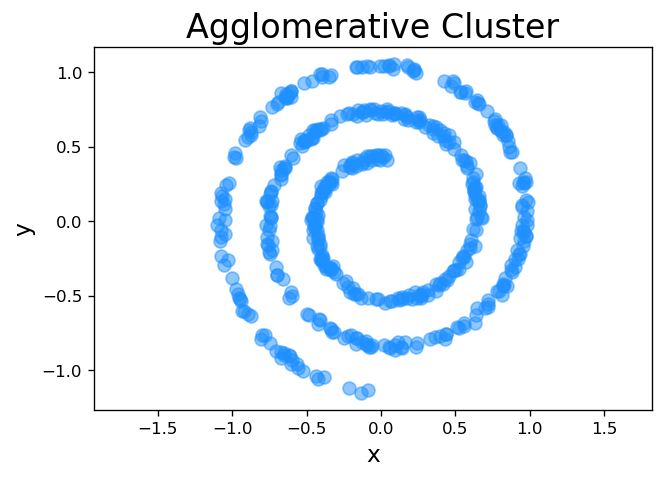

In [7]:
# spiral.py
import numpy as np
import sklearn.cluster as sc
import matplotlib.pyplot as mp
n_samples = 500
t = 2.5 * np.pi * (1 + 2 * np.random.rand(n_samples, 1))
x = 0.05 * t * np.cos(t)
y = 0.05 * t * np.sin(t)
n = 0.05 * np.random.rand(n_samples, 2)
x = np.hstack((x, y)) + n
mp.figure('Agglomerative Cluster', dpi=120)
mp.title('Agglomerative Cluster', fontsize=20)
mp.xlabel('x', fontsize=14)
mp.ylabel('y', fontsize=14)
mp.tick_params(labelsize=10)
mp.axis('equal')
mp.scatter(x[:, 0], x[:, 1], c='dodgerblue', alpha=0.5, s=60)
mp.show()

### 5. 轮廓系数

- 好的聚类：内密外疏，同一个聚类内部的样本要足够密集，不同聚类之间样本要足够疏远。

        好
        A : 电视机，电冰箱
        B : 皮夹克，羽绒服
        差
        A : 电视机，羽绒服
        B : 电冰箱，皮夹克
        
- 针对样本空间中的一个特定样本，计算它与所在聚类其它样本的平均距离a，以及该样本与距离最近的另一个聚类中所有样本的平均距离b，该样本的轮廓系数为$(b-a)/max(a, b)$，将整个样本空间中所有样本的轮廓系数取算数平均值，作为聚类划分的性能指标s。

          -1 <----- 0 -----> 1 
        最差    聚类重叠     最好
        
        sm.silhouette_score(输入集, 输出集, sample_size=样本数, metric=距离算法)->平均轮廓系数
        距离算法：euclidean，欧几里得距离

0.5773232071896658


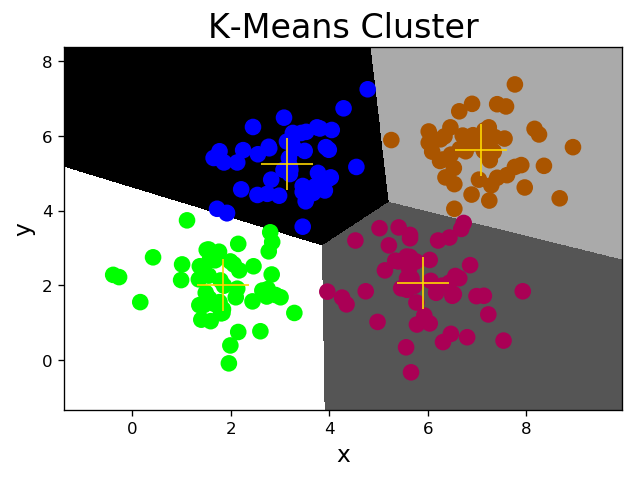

In [12]:
# score.py
import numpy as np
import sklearn.cluster as sc
import sklearn.metrics as sm
import matplotlib.pyplot as mp
x = []
with open('../data/multiple3.txt', 'r') as f:
    for line in f.readlines():
        data = [float(substr) for substr
                in line.split(',')]
        x.append(data)
x = np.array(x)
# K均值聚类器
model = sc.KMeans(n_clusters=4)
model.fit(x)
centers = model.cluster_centers_
l, r, h = x[:, 0].min() - 1, x[:, 0].max() + 1, 0.005
b, t, v = x[:, 1].min() - 1, x[:, 1].max() + 1, 0.005
grid_x = np.meshgrid(np.arange(l, r, h),
                     np.arange(b, t, v))
flat_x = np.c_[grid_x[0].ravel(), grid_x[1].ravel()]
flat_y = model.predict(flat_x)
grid_y = flat_y.reshape(grid_x[0].shape)
pred_y = model.predict(x)
# 打印平均轮廓系数
print(sm.silhouette_score(
    x, pred_y, sample_size=len(x),
    metric='euclidean'))
mp.figure('K-Means Cluster', dpi=120)
mp.title('K-Means Cluster', fontsize=20)
mp.xlabel('x', fontsize=14)
mp.ylabel('y', fontsize=14)
mp.tick_params(labelsize=10)
mp.pcolormesh(grid_x[0], grid_x[1], grid_y,
              cmap='gray')
mp.scatter(x[:, 0], x[:, 1], c=pred_y, cmap='brg',
           s=80)
mp.scatter(centers[:, 0], centers[:, 1], marker='+',
           c='gold', s=1000, linewidth=1)
mp.show()

### 6. DBSCAN(带噪声的基于密度的聚类)算法

- 朋友的朋友也是朋友，从样本空间中任意选择一个样本，以事先给定的半径做圆，凡被该圆圈中的样本都视为与该样本处于相同的聚类，以这些被圈中的样本为圆心继续做圆，重复以上过程，不断扩大被圈中样本的规模，直到再也没有新的样本加入为止，至此即得到一个聚类。于剩余样本中，重复以上过程，直到耗尽样本空间中的所有样本为止。

    1. 事先给定的半径会影响最后的聚类效果，可以借助轮廓系数选择较优的方案。
    2. 根据聚类的形成过程，把样本细分为以下三类：
        - 外周样本：被其它样本聚集到某个聚类中，但无法再引入新样本的样本。
        - 孤立样本：聚类中的样本数低于所设定的下限，则不称其为聚类，反之称其为孤立样本。
        - 核心样本：除了外周样本和孤立样本以外的样本。

0.7999999999999999
0.6366395861050828


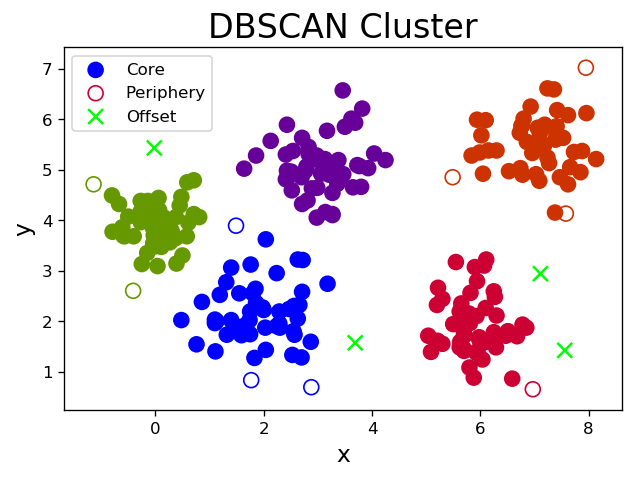

In [13]:
# dbscan.py
import numpy as np
import sklearn.cluster as sc
import sklearn.metrics as sm
import matplotlib.pyplot as mp
x = []
with open('../data/perf.txt', 'r') as f:
    for line in f.readlines():
        data = [float(substr) for substr in line.split(',')]
        x.append(data)
x = np.array(x)
epsilons, scores, models = np.linspace(0.3, 1.2, 10), [], []
for epsilon in epsilons:
        # DBSCAN聚类器
    model = sc.DBSCAN(eps=epsilon, min_samples=5)
    model.fit(x)
    score = sm.silhouette_score(
        x, model.labels_, sample_size=len(x),
        metric='euclidean')
    scores.append(score)
    models.append(model)
scores = np.array(scores)
best_index = scores.argmax()
best_epsilon = epsilons[best_index]
print(best_epsilon)
best_score = scores[best_index]
print(best_score)
best_model = models[best_index]
pred_y = best_model.fit_predict(x)
core_mask = np.zeros(len(x), dtype=bool)
core_mask[best_model.core_sample_indices_] = True
offset_mask = best_model.labels_ == -1
periphery_mask = ~(core_mask | offset_mask)

mp.figure('DBSCAN Cluster', dpi=120)
mp.title('DBSCAN Cluster', fontsize=20)
mp.xlabel('x', fontsize=14)
mp.ylabel('y', fontsize=14)
mp.tick_params(labelsize=10)
labels = set(pred_y)
cs = mp.get_cmap('brg', len(labels))(range(len(labels)))
mp.scatter(x[core_mask][:, 0], x[core_mask][:, 1],
           c=cs[pred_y[core_mask]], s=80,
           label='Core')
mp.scatter(x[periphery_mask][:, 0], x[periphery_mask][:, 1],
           edgecolor=cs[pred_y[periphery_mask]],
           facecolor='none', s=80, label='Periphery')
mp.scatter(x[offset_mask][:, 0], x[offset_mask][:, 1],
           c=cs[pred_y[offset_mask]], marker='x',
           s=80, label='Offset')
mp.legend()
mp.show()